## Arsenal - Thierry Henry - 2003/4

Going to look at various plots on Thierry Henry's performance across the Invincible season.

First start with a map of Henry's average shot position across all games.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

parser = Sbopen()
df_matches = parser.match(competition_id=2, season_id=44)
#our team
team = "Arsenal"
#get list of games by our team, either home or away
match_ids = df_matches.loc[(df_matches["home_team_name"] == team) | (df_matches["away_team_name"] == team)]["match_id"].tolist()
#calculate number of games
no_games = len(match_ids)

In [26]:
player = "Thierry Henry"

# create an empty dataframe
henry_shots = pd.DataFrame()

# go through each match ID
for idx in match_ids:
    # open the event data for this game [0]
    df = parser.event(idx)[0]
    # this is for either half of the match
    for period in [1,2]:
        mask_shot = (df.player_name == player) & (df.type_name == "Shot") & (df.period == period)
        # again keep only columns we want, this case only when the shot was taken
        shots = df.loc[mask_shot, ["x", "y", "outcome_name"]]
        #concatenate dataframe with a previous one to keep danger passes from the whole tournament
        henry_shots = pd.concat([henry_shots, shots], ignore_index = True)


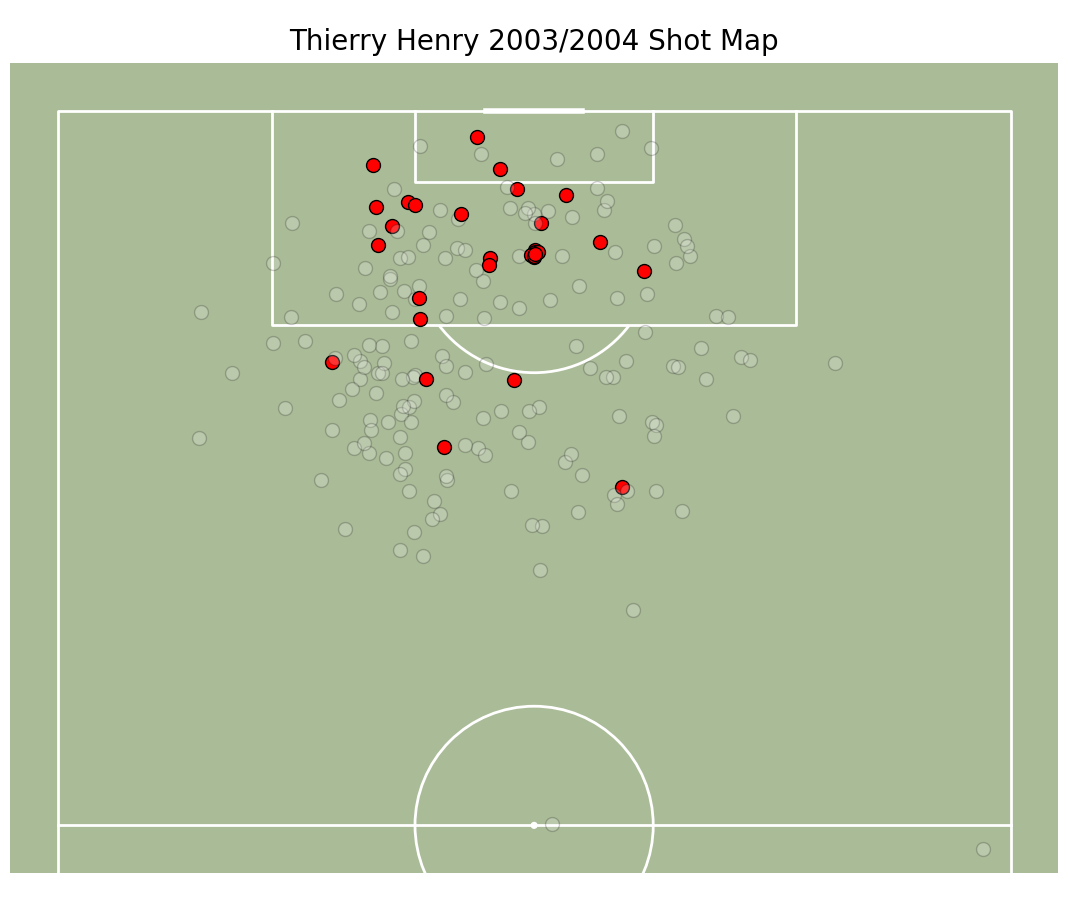

In [44]:
from mplsoccer import Pitch, VerticalPitch

pitch = VerticalPitch(pitch_color='#aabb97', line_color='white', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                    endnote_height=0.04, title_space=0, endnote_space=0)

# Loop through each shot and plot them:
for i,shot in henry_shots.iterrows():
    x_coord = shot['x']
    y_coord = shot['y']
    goal = shot['outcome_name'] == 'Goal'

    if goal:
        # set circle size
        circSize = 0.5
        pitch.scatter(x_coord, y_coord, alpha = 1, s = 100, color = "red", ax=ax['pitch'], edgecolors="black")

    else:
        circSize = 0.1
        pitch.scatter(x_coord, y_coord, alpha = 0.2, s = 100, color = "white", ax=ax['pitch'], edgecolors="black")

fig.suptitle("Thierry Henry 2003/2004 Shot Map", fontsize = 20)
plt.show()

